In [37]:
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import rc
import matplotlib.pyplot as plt

In [38]:
%matplotlib ipympl

In [39]:
rc('figure', autolayout=True, figsize=[16, 9], dpi=72, titlesize=26 )
rc('font', family='monospace')
rc('axes', titlesize=24, titleweight='heavy', labelsize=22, labelweight='bold')
rc(('xtick', 'ytick'), labelsize = 24)
rc('legend', fontsize=20)

In [40]:
data_dir = '/home/sarthak/my_projects/argset/data/iv_curve/'

In [41]:
file_data = f'{data_dir}/CEZAMAT_ArGSet_SiPM2.xlsx'

In [42]:
file_data_2 = f'{data_dir}/SiPM2_IV_Plot.csv'

In [43]:
file_data_3 = f'{data_dir}/ArGSet_SiPM1_VI_Curve.csv'

In [44]:
data = pd.read_excel(file_data)

In [45]:
data_2 = pd.read_csv(file_data_2)

In [46]:
data.head()

,Voltage (v),Current (uA),Unnamed: 2
0,5.0,-1.0,NaN
1,10.0,-1.0,NaN
2,15.0,-1.0,NaN
3,20.0,-1.0,NaN
4,25.0,-1.0,NaN


In [47]:
data_2.head()

,volt,current
0,29.00,-1.0
1,29.20,NaN
2,29.40,-1.0
3,29.45,-1.0
4,29.50,-1.0


In [48]:
data_3 = pd.read_csv(file_data_3)

In [49]:
data_3.head()

,Volt,Current
0,NaN,NaN
1,5.0,-2.0
2,10.0,-2.0
3,15.0,-1.0
4,20.0,-1.0


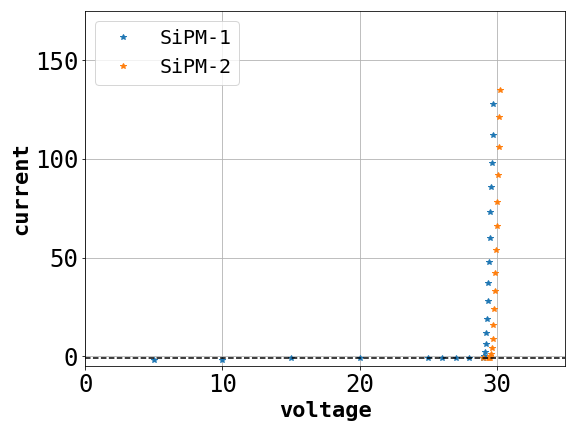

In [50]:
plt.close(1)

plt.figure(1, figsize=(8,6))
plt.plot(data_3['Volt'][1:], data_3['Current'][1:], '*', label='SiPM-1')
# plt.plot(data['Voltage (v)'], data['Current (uA)'], label='SiPM-2 run_01')
plt.plot(data_2['volt'], data_2['current'], '*', label='SiPM-2') # run_02')
# plt.title('I-V plots for ArGSet with light inlet port exposed to ambient light')
plt.grid()
plt.axhline(y=-1.0, color='Black', linestyle='--')
plt.xlabel('voltage')
plt.ylabel('current')
plt.ylim(-5.0, 175.0)
plt.xlim(0.0, 35.0)
plt.legend(loc= 'upper left')
# plt.savefig('../plots/IV_curve_SiPM.pdf')

In [51]:
def st_line(x, m, c):
    return m*x + c

In [52]:
popt_SiPM2, pcov_SiPM2 = curve_fit(st_line, data_2['volt'][7:20], data_2['current'][7:20], p0=[200, -5000])

In [53]:
plt.figure(1)
plt.plot(data_2['volt'][7:20], 
         st_line(data_2['volt'][7:20], popt_SiPM2[0], popt_SiPM2[1]), label='best fit to SiPM-2')
plt.legend()

In [54]:
popt_SiPM2[0]

222.41758241763108

In [55]:
popt_SiPM2[1]

-6601.406593410079

In [56]:
data_2['current'][20]

nan

In [57]:
## breakdown voltage for SiPM-2

In [58]:
(-1 - popt_SiPM2[1])/popt_SiPM2[0]

29.675741106728545

In [59]:
## Breakdown voltage for SiPM 1

In [60]:
popt_SiPM1, pcov_SiPM1 = curve_fit(st_line, data_3['Volt'][12:25], data_3['Current'][12:25], p0=[200, -5000])

In [61]:
data_3[1:25]

,Volt,Current
1,5.00,-2.0
2,10.00,-2.0
3,15.00,-1.0
4,20.00,-1.0
5,25.00,-1.0
6,26.00,-1.0
7,27.00,-1.0
8,28.00,-1.0
9,29.00,-1.0
10,29.05,0.0


In [62]:
popt_SiPM1

array([  213.62637211, -6236.75819705])

In [63]:
plt.figure(1)
plt.plot(data_3['Volt'][12:25], 
         st_line(data_3['Volt'][12:25], popt_SiPM1[0], popt_SiPM1[1]), label='best fit to SiPM-1')
plt.legend()

In [64]:
(-1 - popt_SiPM1[1])/popt_SiPM1[0]

29.19002057428421

 SiPM | breakdown voltage |
 ___
 2    | 29.67             | 
 ___
 1    | 29.19             |